In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [2]:
df = pd.read_csv('/home/miaocj/docker_dir/kNN-overlap-finder/notebooks/visulization/time_maxrss.txt',sep='\t',header=None)

In [11]:
header = ['SimHash_Before','SimHash_Now','MinHash']

In [24]:
time = df.iloc[:,:3]
max_rss = df.iloc[:,3:]

In [39]:
def time_to_seconds(time_str):  
    h, m, s = map(int, time_str.split(':'))  
    return h*3600 + m*60 + s  

In [40]:
time2 = time.applymap(lambda x: time_to_seconds(x) if ':' in str(x) else x)  


/tmp/ipykernel_1519095/3311531228.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  time2 = time.applymap(lambda x: time_to_seconds(x) if ':' in str(x) else x)


In [41]:
time2

,SimHash_Before,SimHash_Now,MinHash
HLA,86099,6012,13585
IGK,2726,270,485
IGH,5578,619,1157
chr22,1346,148,270


In [36]:
type(time.loc[:,'SimHash_Before'])

pandas.core.series.Series

In [25]:
regions = ['HLA','IGK','IGH','chr22']
max_rss.columns = header
time.columns = header
max_rss.index = regions
time.index=regions

/tmp/ipykernel_1519095/4178535679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_rss2 = max_rss.rename(index={'0':'chr22','1':'HLA','2':'IGH','3':'IGK'},inplace=True)
/tmp/ipykernel_1519095/4178535679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time2 = time.rename(index={'0':'chr22','1':'HLA','2':'IGH','3':'IGK'},inplace=True)


/home/miaocj/docker_dir/kNN-overlap-finder/.snakemake/conda/3172702e82c9c1d9450fdd20452651b9_/lib/python3.12/site-packages/brokenaxes.py:344: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  result.append(getattr(ax, method)(*args, **kwargs))
/home/miaocj/docker_dir/kNN-overlap-finder/.snakemake/conda/3172702e82c9c1d9450fdd20452651b9_/lib/python3.12/site-packages/brokenaxes.py:344: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  result.append(getattr(ax, method)(*args, **kwargs))


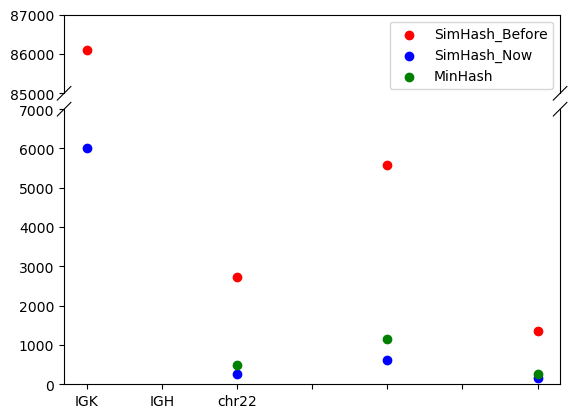

In [60]:
# 创建散点图 
from brokenaxes import brokenaxes  
colors = ['red','blue','green']
bax = brokenaxes(ylims=((0,7000),(85000,87000)), hspace=.09, despine=False)  
for i,methods in enumerate(header):
    method_data = time2.loc[:,methods]
    bax.scatter(regions,method_data, c=colors[i],label=methods)
# 设置 x 轴标签和刻度  
bax.set_xticks(range(len(regions)))  
bax.set_xticklabels(regions)  
# # 设置图例  
bax.legend()  
  
# 显示图形  
plt.show()  